

Memahami target pelanggan untuk tim pemasaran untuk merencanakan strategi. Atasan anda ingin mengidentifikasi kelompok belanja berdasarkan pendapatan, umur, dan Spending Score. Atasan anda menginginkan untuk untuk menemukan nomor kelompok yang ideal. Tujuan (objektif) nya adalah membagi target pasar mall anda menjadi beberapa kluster yang dapat didekati dan kami akan membuat subset pasar berdasarkan demografi. Dalam kata lain mengubah populasi besar menjadi bagian-bagian yang mudah dipahami.

Kami menganalisi data menggunakan Algoritma Kmeans clustering untuk membuat segmentasinya.



- Centroids adalah usat cluster

In [34]:
#pustaka untuk manipulasi data seperti clening
import pandas as pd
#pustaka untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt
#pustaka clustering
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [35]:
df = pd.read_csv('Mall_Customers.csv')

In [36]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#Univariate Analysis

In [37]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


- data berdistibusi normal jika diantara mean dan median hampir sama

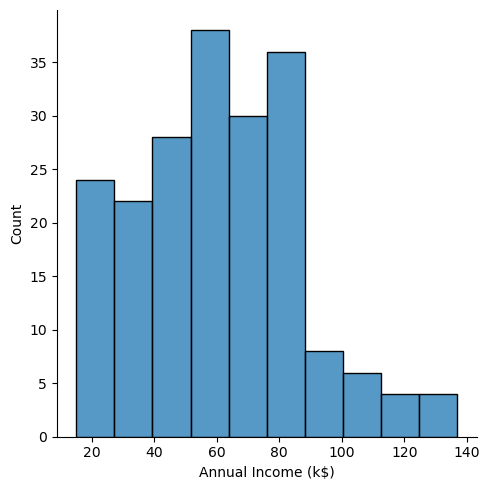

In [38]:
#histogram
sns.displot(df['Annual Income (k$)'])

In [39]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

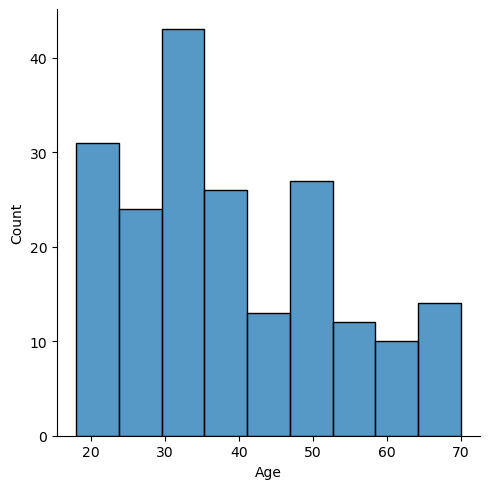

<Figure size 640x480 with 0 Axes>

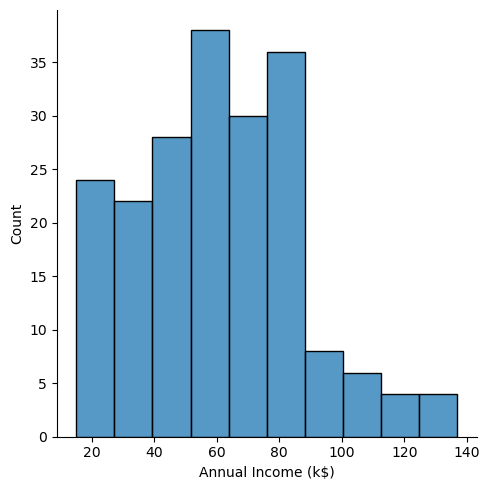

<Figure size 640x480 with 0 Axes>

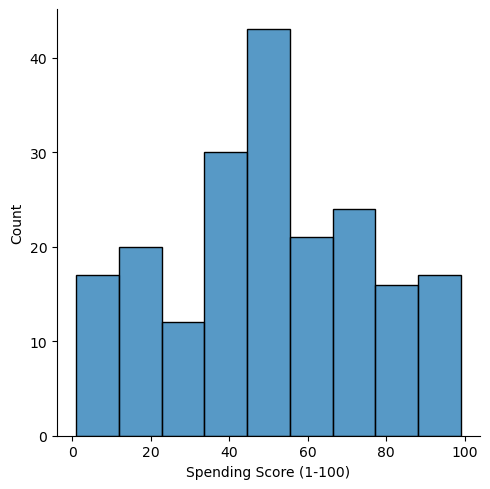

In [40]:
columns =  ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
#membuat perulangan
for i in columns:
  plt.figure()    #untuk membuat figur baru disetiap perulangan
  sns.displot(df[i])


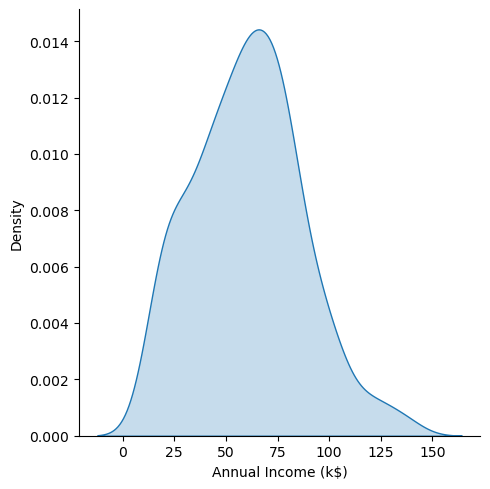

In [101]:
#membuatplot kde
sns.displot(df['Annual Income (k$)'],fill=True, kind='kde')

<Figure size 640x480 with 0 Axes>

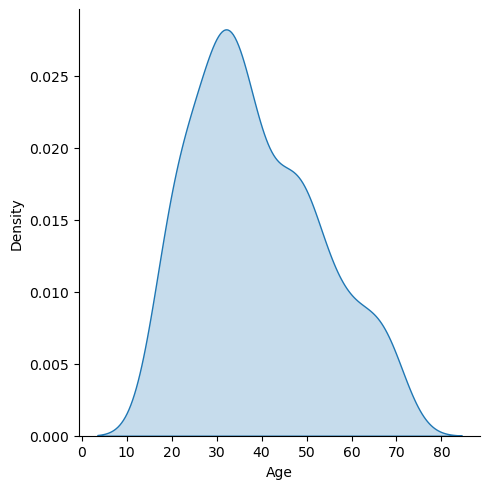

<Figure size 640x480 with 0 Axes>

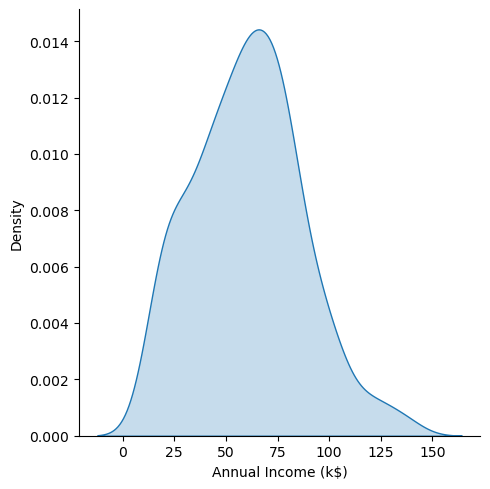

<Figure size 640x480 with 0 Axes>

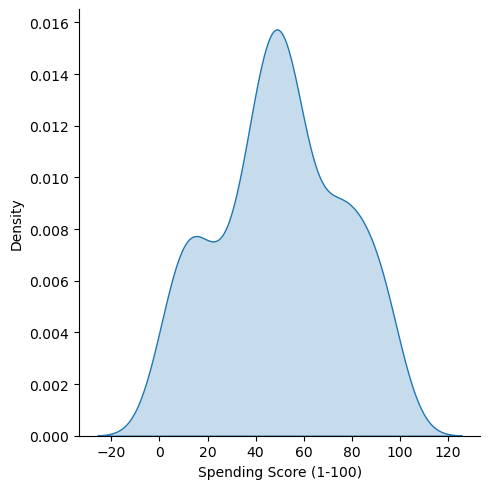

In [42]:
for i in columns:
  plt.figure()    #untuk membuat figur baru disetiap perulangan
  sns.displot(df[i],fill=True, kind='kde')

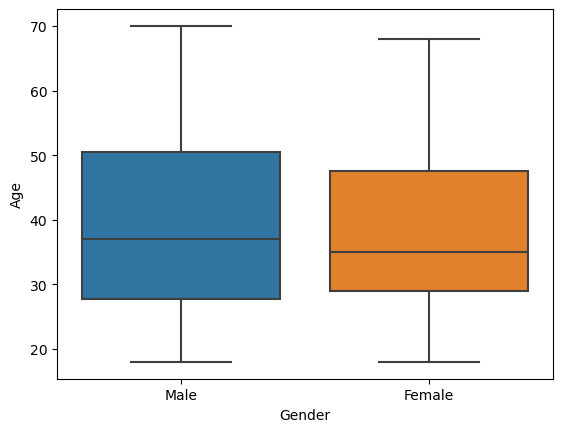

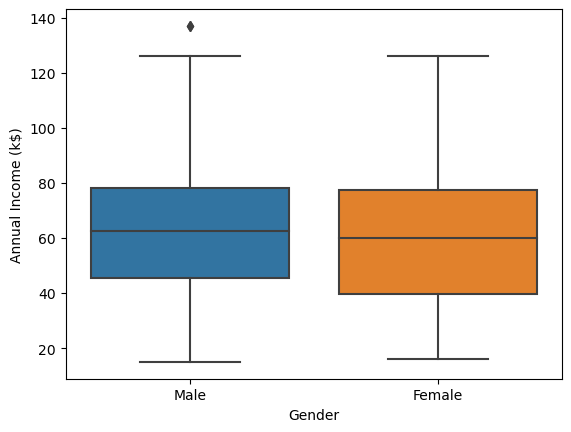

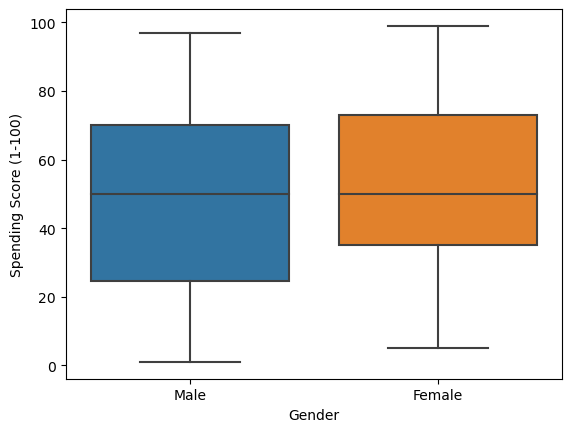

In [43]:
for i in columns:
  plt.figure()    #untuk membuat figur baru disetiap perulangan
  sns.boxplot(data=df,x='Gender', y=df[i])

Analisis boxplot atribut Gender terhadap Age, Annual Income, dan Spending score
- Gambar 1 (Age): nilai median pria lebih tinggi daripada median wanita
- Gambar 2 (Annual) : nilai median sama tetapi terdapat outlier pada pria
- Gambar 3 (Spending) : pria memiliki lebih banyak nilai

In [44]:
#Melihat presentase pria dan wanita
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

In [45]:
columns

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

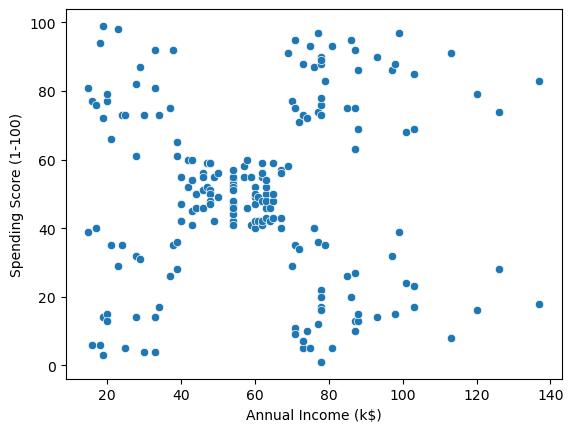

In [46]:
sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)')

Analisis scatterplot
- Terlihat 5/6 cluster antara dua variabel
- axis=0 adalah baris, axis=1 adalah kolom

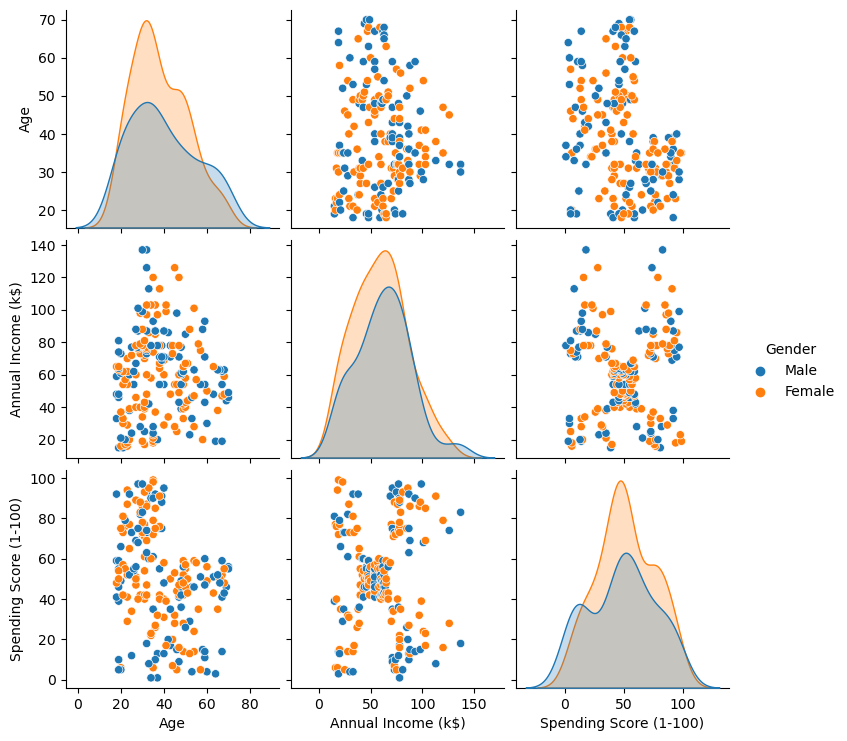

In [47]:
df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender') 

In [48]:
#melihat mean berdasarkan gender
df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

C:\Users\Lenovo 120s\AppData\Local\Temp\ipykernel_5172\1501926060.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [49]:
df.corr()

C:\Users\Lenovo 120s\AppData\Local\Temp\ipykernel_5172\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


C:\Users\Lenovo 120s\AppData\Local\Temp\ipykernel_5172\3526971439.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap='coolwarm')    # annot untuk meihat atributnya, cmap untuk pemetaan warnanya


<Axes: >

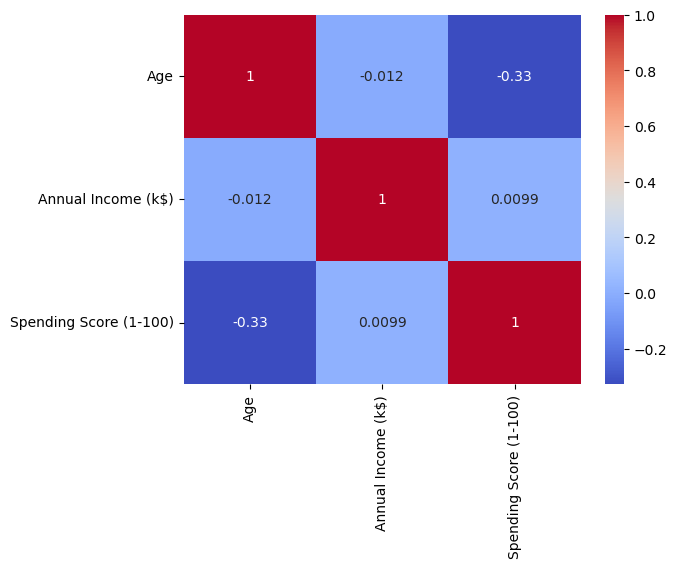

In [50]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')    # annot untuk meihat atributnya, cmap untuk pemetaan warnanya

# Clustering Univariate, Bivariate , and Multivariate

In [51]:
clustering1 = KMeans(n_clusters=3
                    )

In [52]:
clustering1.fit(df[['Annual Income (k$)']])

C:\Users\Lenovo 120s\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo 120s\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [53]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [54]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [55]:
df['Income Cluster'].value_counts()

2    90
0    74
1    36
Name: Income Cluster, dtype: int64

In [56]:
clustering1.inertia_

23517.33093093093

 - Coba metode siku

In [57]:
inertia_score=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Income Cluster']])
    inertia_score.append(kmeans.inertia_)

C:\Users\Lenovo 120s\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo 120s\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo 120s\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo 120s\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

In [58]:
inertia_score

[162.71999999999994,
 24.218181818181815,
 2.9108967402655336e-28,
 2.6557495412331126e-28,
 2.9108967402655336e-28,
 2.6557495412331126e-28,
 2.6557495412331126e-28,
 2.6557495412331126e-28,
 2.6557495412331126e-28,
 2.6557495412331126e-28]

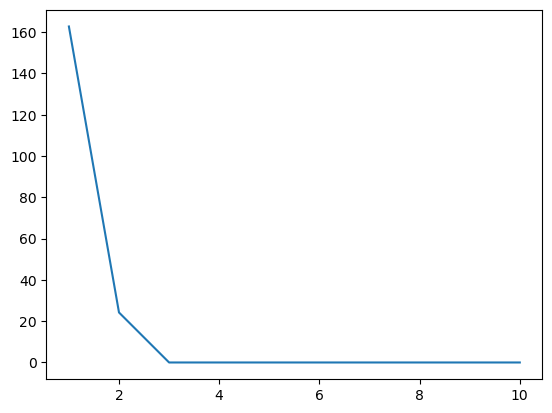

In [59]:
plt.plot(range(1,11), inertia_score)

- Siku nya ada di range 3 jadi kita bisa memilih 3 cluster

In [60]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [61]:
#berapa mean 
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

C:\Users\Lenovo 120s\AppData\Local\Temp\ipykernel_5172\580137353.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


In [62]:
#Bivariate Clustering
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending Score and Income Cluster']=clustering2.labels_
df.head()

C:\Users\Lenovo 120s\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo 120s\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Score and Income Cluster
0,Male,19,15,39,0,3
1,Male,21,15,81,0,0
2,Female,20,16,6,0,3
3,Female,23,16,77,0,0
4,Female,31,17,40,0,3


C:\Users\Lenovo 120s\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo 120s\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo 120s\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo 120s\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

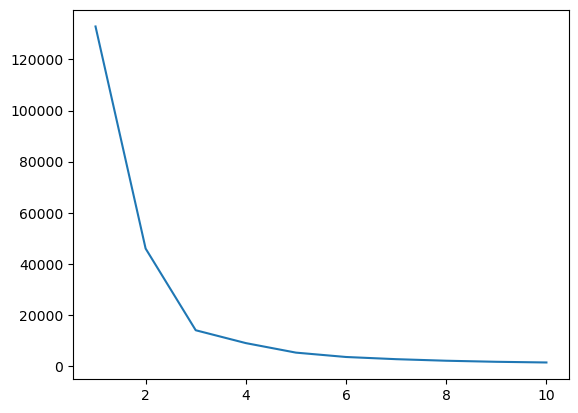

In [63]:
inertia_score2=[]
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Income Cluster', 'Spending Score (1-100)']])
    inertia_score2.append(kmeans2.inertia_)
plt.plot(range(1,11), inertia_score2)

In [71]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns =['x','y']

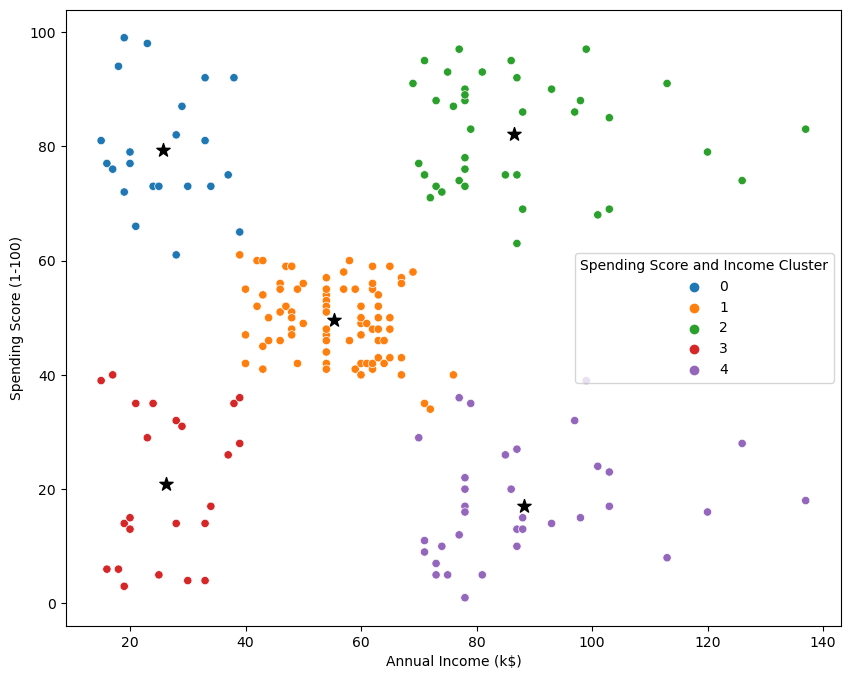

In [94]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'], s=100,c='black', marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending Score and Income Cluster',palette='tab10')
plt.savefig('clustering_bivariate.png')

In [74]:
pd.crosstab(df['Spending Score and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending Score and Income Cluster,,
0,0.590909,0.409091
1,0.592593,0.407407
2,0.538462,0.461538
3,0.608696,0.391304
4,0.457143,0.542857


- Cluster 2 menghasilkan banyak uang, yaitu cluster yang lebih banyak wanitanya dan memiliki Spending score dan Annual income yang tinggi. Hal ini menyebabkan cluster 2 menjadi kelompok target.

In [75]:
#Melihat usia rata-rata dimasing-masing cluster
df.groupby('Spending Score and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

C:\Users\Lenovo 120s\AppData\Local\Temp\ipykernel_5172\2892707826.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Spending Score and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Spending Score and Income Cluster,,,
0,25.272727,25.727273,79.363636
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,41.114286,88.200000,17.114286


- terlihat bahwa rata-rata usia cluster 2 adalah 32 tahun. usia rendah dengan penghasilan dan pengeluaran yang tinggi
- namun, usia terendah ada pada cluster 0 yaitu pnghasilan yang sangat rendah dan pengeluaran yang sangat tinggi. Kemungkinan pasar tersebut menjual barang yang mahal yang mungkin akan dibeli secara royal setahun sekali

# Multivariate Clustering

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scale = StandardScaler()

In [78]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Score and Income Cluster
0,Male,19,15,39,0,3
1,Male,21,15,81,0,0
2,Female,20,16,6,0,3
3,Female,23,16,77,0,0
4,Female,31,17,40,0,3


In [81]:
dff = pd.get_dummies(df, drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Score and Income Cluster,Gender_Male
0,19,15,39,0,3,1
1,21,15,81,0,0,1
2,20,16,6,0,3,0
3,23,16,77,0,0,0
4,31,17,40,0,3,0


In [82]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending Score and Income Cluster', 'Gender_Male'],
      dtype='object')

In [83]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]

In [84]:
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [85]:
dff = pd.DataFrame(scale.fit_transform(dff))

In [86]:
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


C:\Users\Lenovo 120s\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo 120s\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo 120s\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo 120s\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

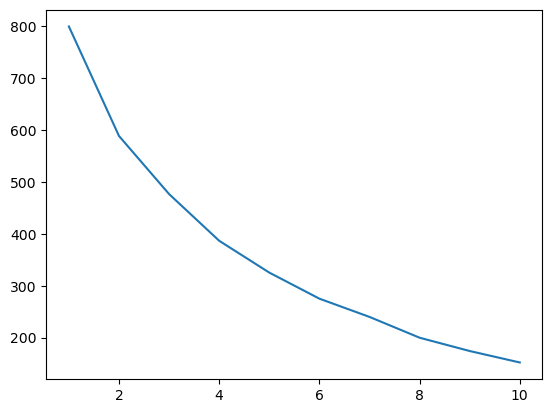

In [89]:
inertia_score3=[]
for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_score3.append(kmeans3.inertia_)
plt.plot(range(1,11), inertia_score3)

In [91]:
#Mutivariate Clustering
clustering3 = KMeans(n_clusters=4)
clustering3.fit(dff)
dff['Age, Income, Sprending, and Gender Cluster']=clustering3.labels_
dff.head()

C:\Users\Lenovo 120s\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo 120s\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,0,1,2,3,"Age, Income, Sprending, and Gender Cluster"
0,-1.424569,-1.738999,-0.434801,1.128152,1
1,-1.281035,-1.738999,1.195704,1.128152,1
2,-1.352802,-1.700830,-1.715913,-0.886405,0
3,-1.137502,-1.700830,1.040418,-0.886405,3
4,-0.563369,-1.662660,-0.395980,-0.886405,0


In [92]:
df 

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Score and Income Cluster,"Age, Income, Sprending, and Gender Cluster"
0,Male,19,15,39,0,3,3
1,Male,21,15,81,0,0,3
2,Female,20,16,6,0,3,0
3,Female,23,16,77,0,0,2
4,Female,31,17,40,0,3,0
...,...,...,...,...,...,...,...
195,Female,35,120,79,1,2,2
196,Female,45,126,28,1,4,0
197,Male,32,126,74,1,2,3
198,Male,32,137,18,1,4,1


In [93]:
df.to_csv('Clustering.csv')

# Analisis

- Analisis berdasarkan Bivariate Clustering karena sudah terlihat jelas

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

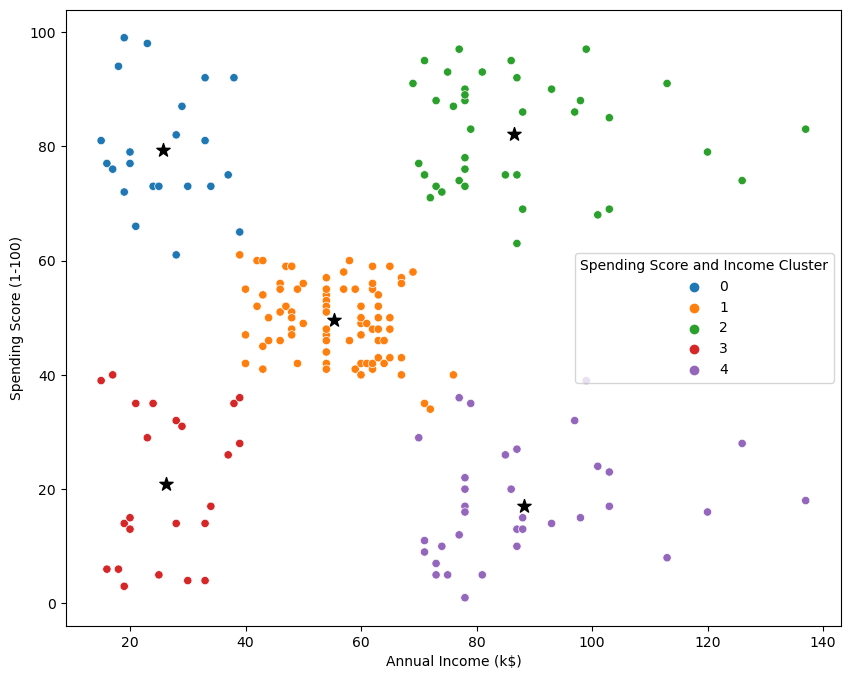

In [103]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'], s=100,c='black', marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending Score and Income Cluster',palette='tab10')

Analisis 
1. Kelompok targetnya dalah kluster 2 dimana memiliki pengeluaran dan penghasilan yang tinggi
2. 54% dari pelanggan kluster 2 adalah perempuan. Kita harus melihat bagaimana menarik perhatian customer2 itu menggunakan kampanye pemasaran yang menargetkan item populer dalam kluster tersebut.
3. Kluster 0 mempresentasikan peluang ketertarikan untuk pasar kepada pelanggan untuk event penjualan pada item popular.